# Import The Necessary Modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import numpy as np
from sklearn.model_selection import train_test_split # make training & testing data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

### Helper Functions

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def specificity_score(y_true, y_pred_model):
    # Separate Confusion Matrix for Specificity Value
    TP = confusion_matrix(y_true,y_pred_model)[1][1]
    TN = confusion_matrix(y_true,y_pred_model)[0][0]
    FP = confusion_matrix(y_true,y_pred_model)[0][1]
    FN = confusion_matrix(y_true,y_pred_model)[1][0]
    return TN / (TN + FP)

def printConfusionMatrix(y_true, y_pred_model, model, status):
    confusion_matrix_model = confusion_matrix(y_true, y_pred_model)
    sns.heatmap(confusion_matrix_model, annot=True, fmt='d', cmap='Blues', cbar=True)
    plt.title(f'Confusion Matrix - {model} ({status})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print()
    
def printResults(y_true, y_pred_model):
    print(f'Accuracy: {accuracy_score(y_true, y_pred_model)}')
    print(f'Precision: {precision_score(y_true, y_pred_model)}')
    print(f'Recall: {recall_score(y_true, y_pred_model)}')
    print(f'Specificity: {specificity_score(y_true, y_pred_model)}')
    print(f'F1-Score: {f1_score(y_true, y_pred_model)}')

# Set Up Autism DataFrame

In [3]:
# Convert excel file into DataFrame
# If you have trouble reading this file, you may need to do this command in the terminal: pip install openpyxl 
autism = pd.read_excel('Autism_Screening_Adult.xlsx')
autism = autism.drop(columns=['Ethnicity','Country_of_Res','Used_App_Before','Relation','Age_Desc'])

# Convert "yes" values to 1 and "no" values to 0
autism = autism.replace({'no':0,'yes':1,'NO':0,'YES':1})

# Convert "f" to 0 and "m" to 1
autism = autism.replace({'f':0,'m':1})

# Convert '?' and the outlier to NaN
autism = autism.replace('?',np.nan)
autism = autism.replace(383.0,np.nan)

# Drop missing values and outlier
autism = autism.dropna()

# Set Up Training, Validation, and Test Data

In [4]:
X = autism.drop(columns=['Age','Result','Class/ASD'])
y = autism['Class/ASD']

### Separate Training, Validation, and Test Data ###
seed=np.random.seed(123)

# Set up the Test Data
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=141) #70 rows is 10% of the autism dataframe; we added one to leave 630 rows left 

# Set up Training and Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_val, y_val, test_size=140) # 140 rows is 20% of the autism dataframe

### Sizes of Each Dataset

In [5]:
# Print sizes of each set
print('Training')
print('X:',X_train.shape)
print('y:',y_train.shape)
print()

print('Validation')
print('X:',X_val.shape)
print('y:',y_val.shape)
print()

print('Test')
print('X:',X_test.shape)
print('y:',y_test.shape)

Training
X: (420, 13)
y: (420,)

Validation
X: (140, 13)
y: (140,)

Test
X: (141, 13)
y: (141,)


# Models

## K Nearest Neighbors Classifier

In [16]:
best_score = 0
best_k = 0

for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #y_pred_val = knn.predict(X_val)
    score = knn.score(X_val, y_val)
    if score > best_score:
        best_score = score
        best_k = k

print(best_score)
print(best_k)

0.9785714285714285
13


### Validation

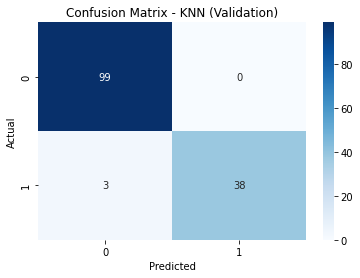


Accuracy: 0.9785714285714285
Precision: 1.0
Recall: 0.926829268292683
Specificity: 1.0
F1-Score: 0.9620253164556962


In [7]:
#from Helper_Functions.helpers import printConfusionMatrix, printResults

# Generate new model with the best k-value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Validate the new model
knn.fit(X_train, y_train)
y_pred_val_knn = knn.predict(X_val)

# Print values of the confusion matrix
printConfusionMatrix(y_val, y_pred_val_knn, 'KNN', 'Validation')

# Print results
printResults(y_val, y_pred_val_knn)

## Gaussian Naive Bayes Classifier

In [8]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_val_bayes = naive_bayes.predict(X_val)

### Validation

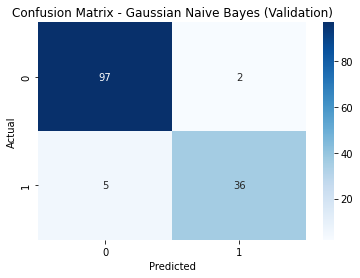


Accuracy: 0.95
Precision: 0.9473684210526315
Recall: 0.8780487804878049
Specificity: 0.9797979797979798
F1-Score: 0.9113924050632911


In [9]:
from Helper_Functions.helpers import printConfusionMatrix, printResults

# Print values of the confusion matrix
printConfusionMatrix(y_val, y_pred_val_bayes, 'Gaussian Naive Bayes', 'Validation')

# Print results
printResults(y_val, y_pred_val_bayes)

## Decision Tree Classifier

In [10]:
# Print the columns to help choose features
print(autism.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age', 'Gender',
       'Jaundice', 'Relative', 'Result', 'Class/ASD'],
      dtype='object')


In [11]:
features = X_train.columns
depth_limit = None

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth_limit)

# Fit the model
decision_tree.fit(X_train[features], y_train)

# Predict on validation data
y_pred_val_decision_tree = decision_tree.predict(X_val[features])

### Validation

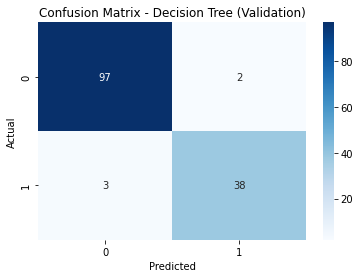


Accuracy: 0.9642857142857143
Precision: 0.95
Recall: 0.926829268292683
Specificity: 0.9797979797979798
F1-Score: 0.9382716049382716



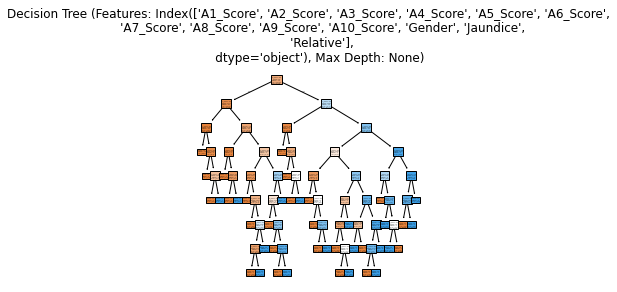

In [12]:
from Helper_Functions.helpers import printConfusionMatrix, printResults

# Print values of the confusion matrix
printConfusionMatrix(y_val, y_pred_val_decision_tree, 'Decision Tree', 'Validation')

# Print results
printResults(y_val, y_pred_val_decision_tree)
print()

# Print the tree
plt.figure(figsize=(4,4))
plot_tree(decision_tree, feature_names=features, class_names=['No ASD','Yes ASD'], filled=True)
plt.title(f'Decision Tree (Features: {features}, Max Depth: {depth_limit})')
plt.show()

## ROC Curve With AUC

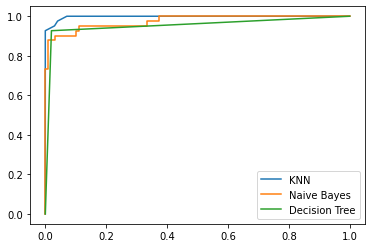



KNN AUC:           0.9634146341463414
Naive Bayes AUC:   0.9289233801428923
Decision Tree AUC: 0.9533136240453313


In [13]:
fig, ax = plt.subplots()

# K-Nearest Neighbors
y_knn_pred_val_proba = knn.predict_proba(X_val)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_val, y_knn_pred_val_proba[:,1])
knn_auc = roc_auc_score(y_val, y_pred_val_knn)
plt.plot(knn_fpr, knn_tpr, label='KNN')

# Bayes
y_bayes_pred_val_proba = naive_bayes.predict_proba(X_val)
bayes_fpr, bayes_tpr, bayes_threshold = roc_curve(y_val, y_bayes_pred_val_proba[:,1])
bayes_auc = roc_auc_score(y_val, y_pred_val_bayes)
plt.plot(bayes_fpr, bayes_tpr, label='Naive Bayes')

# Decision Tree
y_dt_pred_val_proba = decision_tree.predict_proba(X_val)
dt_fpr, dt_tpr, dt_threshold = roc_curve(y_val, y_dt_pred_val_proba[:,1])
dt_auc = roc_auc_score(y_val, y_pred_val_decision_tree)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')

ax.legend()
plt.show()
print()
print()
print('KNN AUC:          ',knn_auc)
print('Naive Bayes AUC:  ', bayes_auc)
print('Decision Tree AUC:', dt_auc)

# Testing

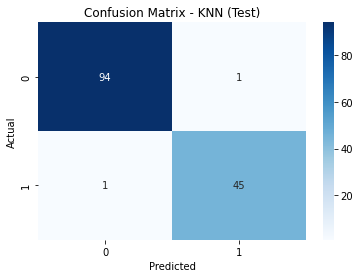


Accuracy: 0.9858156028368794
Precision: 0.9782608695652174
Recall: 0.9782608695652174
Specificity: 0.9894736842105263
F1-Score: 0.9782608695652174


In [14]:
# KNN was the best model
y_pred_test_knn = knn.predict(X_test)

# Print values of the confusion matrix
printConfusionMatrix(y_test, y_pred_test_knn, 'KNN', 'Test')

# Print results
printResults(y_test, y_pred_test_knn)